# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [2]:
import pandas as pd

In [3]:
# Your code here
fraud = pd.read_csv(r"C:\Users\linda\Ironhack\Lesson_Machine_Learning\PS_20174392719_1491204439457_log.csv")

In [4]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
fraud.shape

(6362620, 11)

In [6]:
fraud_sample = fraud.sample(n=20000,random_state=0)

In [7]:
fraud_sample.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
fraud_sample.corr()
# no really correlations only between new and old balance Dest / Org
# outcome is  "isFraud"

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.026292,-0.005918,-0.005892,0.021327,0.020518,0.035542,NaN
amount,0.026292,1.000000,-0.007855,-0.011100,0.379449,0.575758,0.071757,NaN
oldbalanceOrg,-0.005918,-0.007855,1.000000,0.998903,0.081246,0.050402,0.011031,NaN
newbalanceOrig,-0.005892,-0.011100,0.998903,1.000000,0.083277,0.050518,-0.010116,NaN
oldbalanceDest,0.021327,0.379449,0.081246,0.083277,1.000000,0.966227,-0.005624,NaN
newbalanceDest,0.020518,0.575758,0.050402,0.050518,0.966227,1.000000,0.003113,NaN
isFraud,0.035542,0.071757,0.011031,-0.010116,-0.005624,0.003113,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
fraud_sample.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
import seaborn as sns

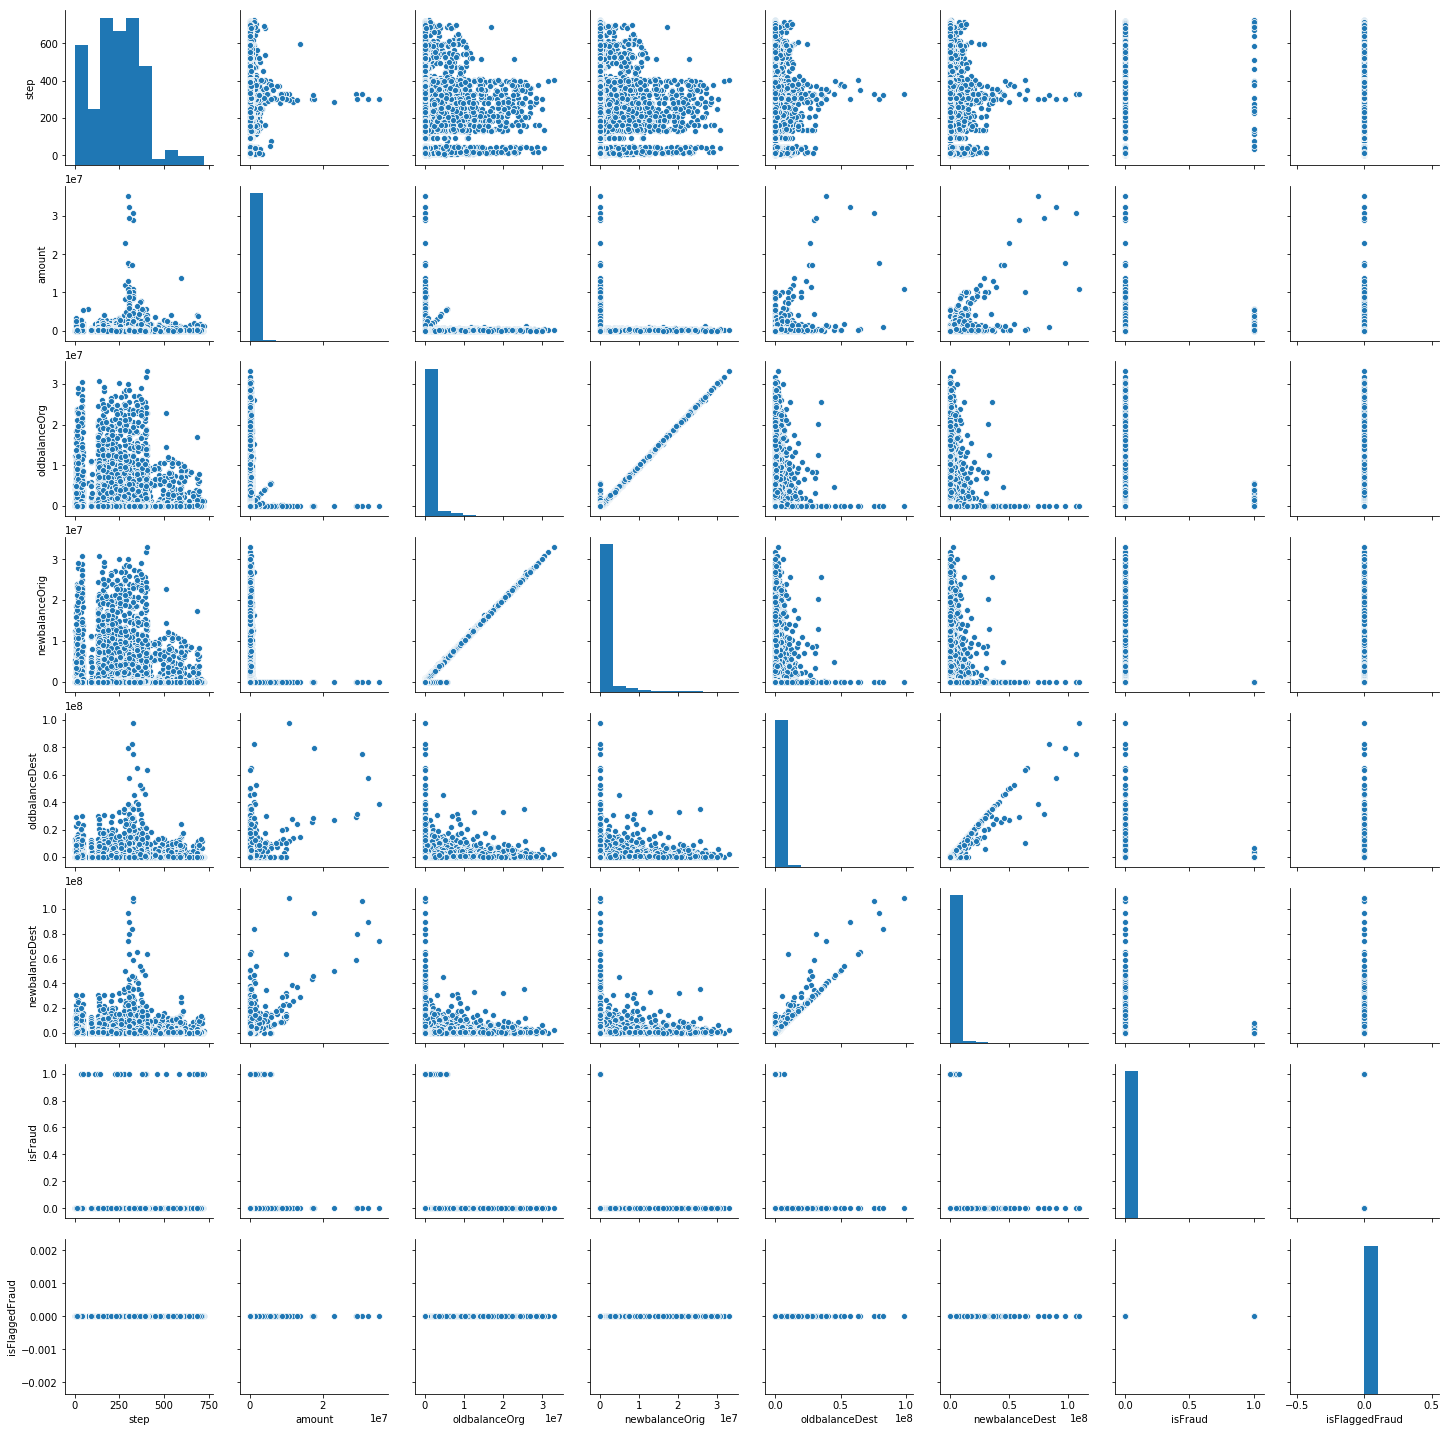

In [11]:
sns.pairplot(fraud_sample)

### What is the distribution of the outcome? 

0    19975
1       25
Name: isFraud, dtype: int64


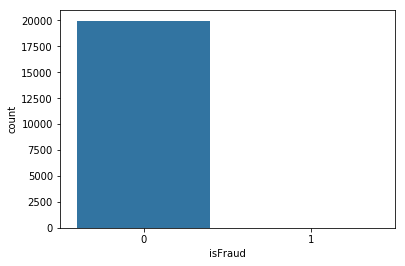

In [20]:
# Your response here
sns.countplot(fraud_sample.isFraud)
print(fraud_sample.isFraud.value_counts())

# Fraud is very small, luckily

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [27]:
# Your code here
# unbalanced data
shuffled_fraud = fraud.sample(frac = 1,random_state=1)
fraud_df = shuffled_fraud.loc[shuffled_fraud.isFraud == 1]

non_fraud_df = shuffled_fraud.loc[shuffled_fraud.isFraud == 0].sample(n=len(fraud_df.isFraud), random_state=1)

In [32]:
normalized_fraud = pd.concat([fraud_df,non_fraud_df])
normalized_fraud.shape

(16426, 11)

In [34]:
normalized_fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [36]:
normalized_fraud.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.146166,0.076922,-0.019379,-0.001214,0.031471,0.316637,0.037230
amount,0.146166,1.000000,0.651663,0.128733,0.021737,0.276807,0.343062,0.067330
oldbalanceOrg,0.076922,0.651663,1.000000,0.820718,0.008211,0.121473,0.133747,0.063965
newbalanceOrig,-0.019379,0.128733,0.820718,1.000000,0.039063,0.005763,-0.125791,0.093034
oldbalanceDest,-0.001214,0.021737,0.008211,0.039063,1.000000,0.927043,-0.080431,-0.007505
newbalanceDest,0.031471,0.276807,0.121473,0.005763,0.927043,1.000000,0.008242,-0.010247
isFraud,0.316637,0.343062,0.133747,-0.125791,-0.080431,0.008242,1.000000,0.031225
isFlaggedFraud,0.037230,0.067330,0.063965,0.093034,-0.007505,-0.010247,0.031225,1.000000


In [ ]:
# step is the only column regarding the time, 1 step is one hour, in total 744 steps = 30 days.
# since we don´t know which date we have I think it doesn´t make sense to transform it into a date form

In [38]:
normalized_fraud.dtypes
# drop step, type -> important -> get dummies, nameOrig -> not necessary, nameDest not necessary (both are codes and doesn´t effect the outcome)
# it would be maybe only interessting to know if the person appears more often when fraud = 1.

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [39]:
normalized_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
637351,35,CASH_OUT,472692.51,C145594916,472692.51,0.0,C1718370785,193065.83,665758.34,1,0
3434399,256,TRANSFER,70696.74,C947315292,70696.74,0.0,C1485351052,0.00,0.00,1,0
3137121,236,CASH_OUT,1418198.25,C1959028014,1418198.25,0.0,C1768881872,1488632.50,2906830.75,1,0
1069777,122,TRANSFER,91637.51,C618768599,91637.51,0.0,C1191948500,0.00,0.00,1,0
6259961,606,CASH_OUT,455788.55,C1120752458,455788.55,0.0,C2045354629,0.00,455788.55,1,0


In [46]:
normalized_fraud = normalized_fraud.drop(columns={"step","nameOrig","nameDest"})


KeyError: "['nameOrig' 'nameDest' 'step'] not found in axis"

In [53]:
normalized_fraud["type"].unique()
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
normalized_fraud["type"] = lb.fit_transform(normalized_fraud["type"])


### Run a logisitc regression classifier and evaluate its accuracy.

In [61]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = normalized_fraud["isFraud"]
X = normalized_fraud.drop(["isFraud"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [67]:
lr = LogisticRegression()

lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100

print(round(acc,2),"%")

82.17 %


C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Now pick a model of your choice and evaluate its accuracy.

In [70]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

y = normalized_fraud['isFraud']
X = normalized_fraud.drop(['isFraud'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)


knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print(round(acc,2),"%")

95.77 %


### Which model worked better and how do you know?

In [71]:
# Your response here
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(lr, X, y, cv=5) 
cv_results

C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

array([0.81801582, 0.81040779, 0.81740718, 0.81881851, 0.89585871])

In [72]:
# knn is the better model, becuase of better results
cv_results = cross_val_score(knn, X,y, cv = 5)
cv_results

array([0.96074254, 0.95343883, 0.95982958, 0.94853837, 0.95676005])

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
import numpy as np

param_grid = {'n_neighbors': np.arange(1,15)} 
knn = neighbors.KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)
knn_cv.best_params_

{'n_neighbors': 1}

In [75]:
# 1 neighbors - > does grid say that I have only 1 cluster? 
# I´ll run knn with 1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print(round(acc,2),"%")


# better but makes not so much sense or?

96.01 %


In [76]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1517,   85],
       [  46, 1638]], dtype=int64)